In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [369]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [370]:
# Shape of Data
df.shape

(8807, 12)

In [371]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [372]:
# Data Types of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [374]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s5406,Movie,Super Monsters Monster Pets,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


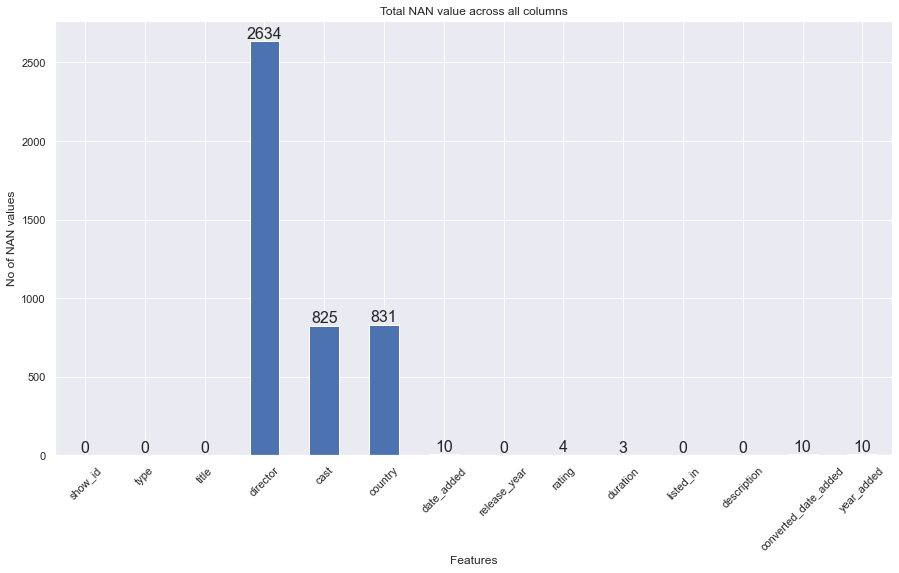

Total NAN values accross all columns:


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [244]:
# Total NAN values accross all columns
plt.figure(figsize = (15,8))
ax = df.isnull().sum().plot(kind='bar')
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0],size=16)
plt.xlabel('Features')
plt.ylabel('No of NAN values')
plt.title('Total NAN value across all columns')
plt.show()
print('Total NAN values accross all columns:')
df.isnull().sum().to_frame()

In [33]:
# Stats summary of all columns
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8131,Movie,Cloudy with a Chance of Meatballs 2,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


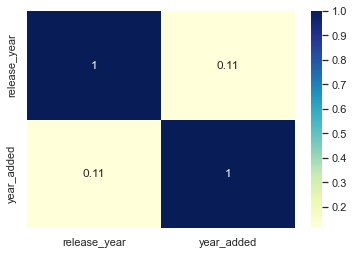

In [327]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

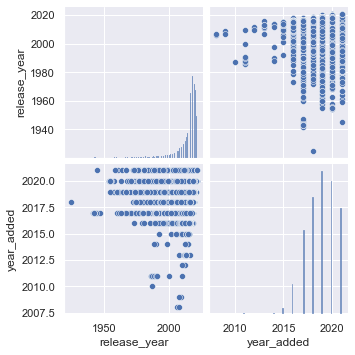

In [329]:
sns.pairplot(df)
plt.show()

,type
Movie,6131
TV Show,2676


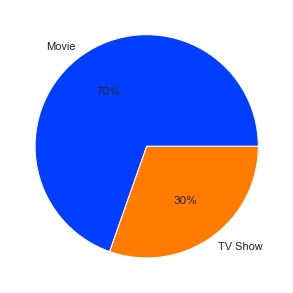

In [44]:
# Total Movies and TV shows
plt.figure(figsize = (5,6))
palette_color = sns.color_palette('bright')
plt.pie(x = df['type'].value_counts().values, labels=df['type'].value_counts().index, colors=palette_color, autopct='%.0f%%')

df['type'].value_counts().to_frame()

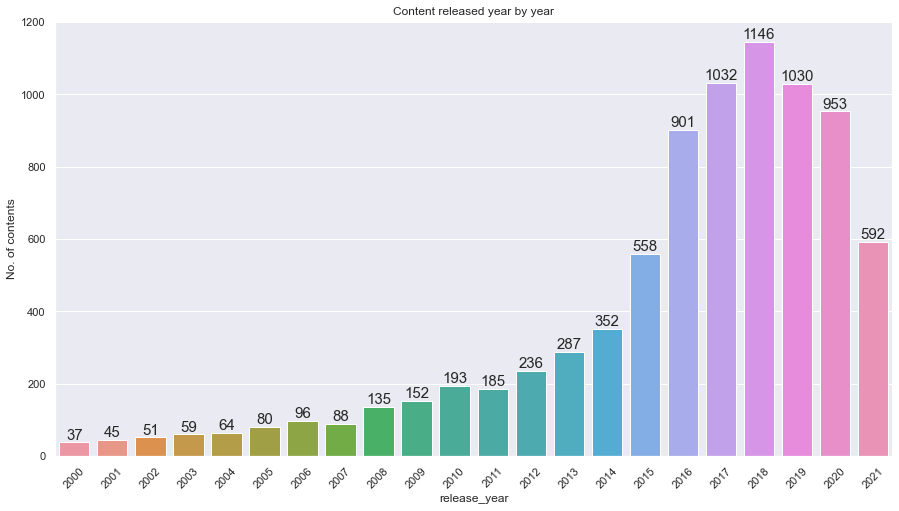

In [456]:
# Total movies/shows released year by year
release_year = df.loc[~df['release_year'].isna()]
# print(release_year['release_year'].value_counts().sort_index(ascending=True))
plt.figure(figsize = (15,8))
# release_year = release_year.loc[release_year['release_year'].isin(np.arange(2000, 2022))]
ax = sns.countplot(x='release_year', data = release_year, order=np.arange(2000, 2022))

plt.ylabel('No. of contents')
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0],size=15)
plt.title('Content released year by year')
plt.show()

In [459]:
release_year['release_year'].describe()

count    8797.000000
mean     2014.183472
std         8.822191
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

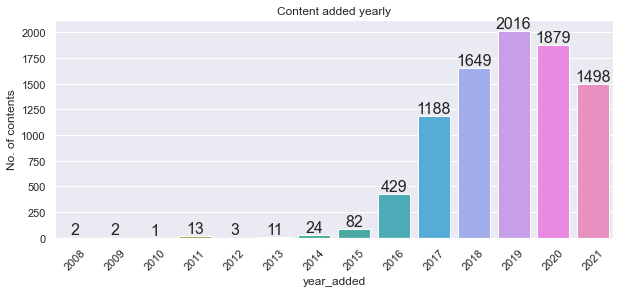

In [384]:
# Total movies/shows added year by year
df = df.loc[~df['date_added'].isna()]
df['converted_date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = list(map(int, df['converted_date_added'].dt.year))
df['month_added'] = list(map(int, df['converted_date_added'].dt.month))
df['day_added'] = list(map(int, df['converted_date_added'].dt.dayofweek))

plt.figure(figsize = (10,4))
ax=sns.countplot(x='year_added', data = df)
plt.ylabel('No. of contents')
plt.xticks(rotation=45)
plt.title('Content added yearly')
plt.bar_label(ax.containers[0],size=16)
plt.show()

# df.year_added.value_counts().sort_index(ascending=False)

In [460]:
df['year_added'].describe()

count    8797.000000
mean     2018.871888
std         1.574243
min      2008.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2021.000000
Name: year_added, dtype: float64

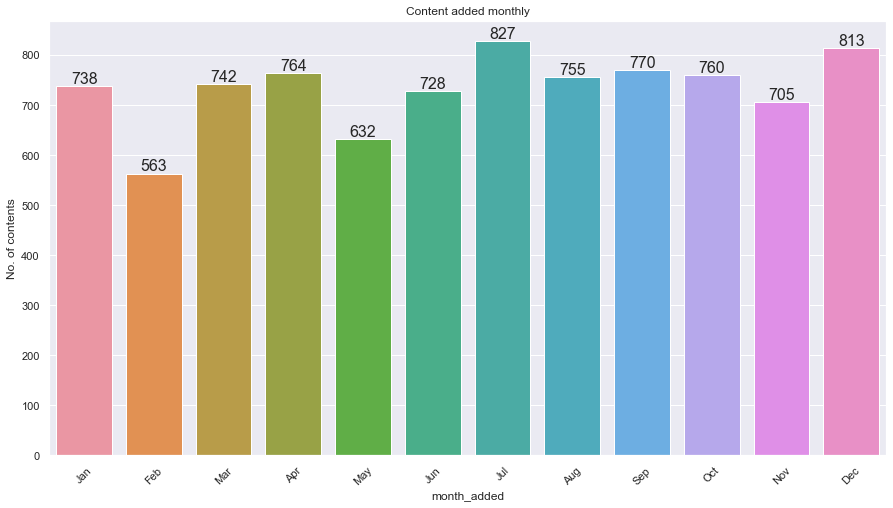

In [390]:
plt.figure(figsize = (15,8))
ax=sns.countplot(x='month_added', data = df)
plt.ylabel('No. of contents')
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.title('Content added monthly')
plt.bar_label(ax.containers[0],size=16)
# plt.xlabel(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

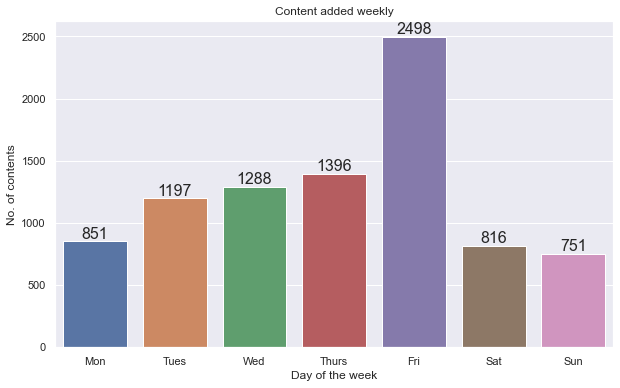

In [391]:
plt.figure(figsize = (10,6))
ax=sns.countplot(x='day_added', data = df)
plt.ylabel('No. of contents')
plt.xticks(range(0,7), ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.title('Content added weekly')
plt.xlabel('Day of the week')
plt.bar_label(ax.containers[0],size=16)
# plt.xlabel(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

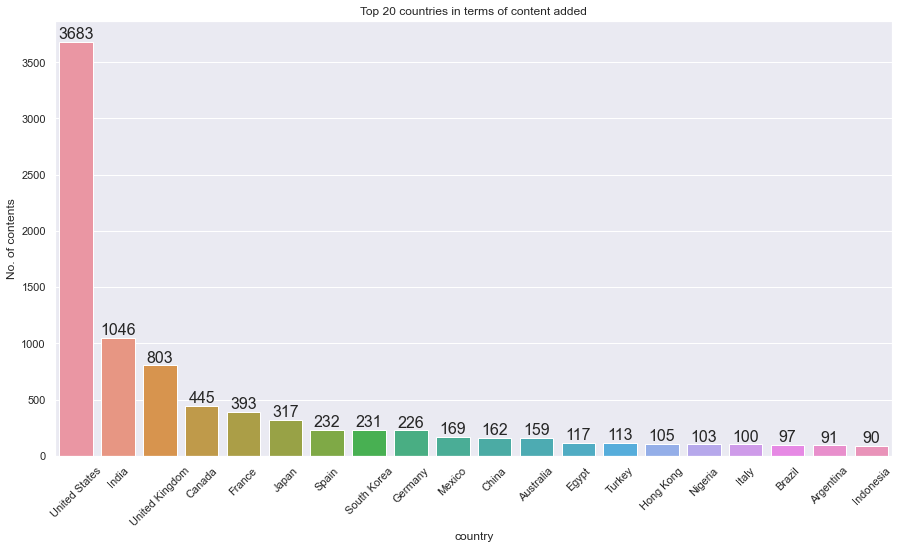

In [392]:
# Total Content added Country wise
# country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist()).stack().to_frame().iloc[:, -1].str.lower().value_counts()
# country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist()).stack()
constraint = df['country'].apply(lambda x: str(x).split(', ')).tolist()

country = pd.DataFrame(constraint, index=df['type'])
country_duration = pd.DataFrame(constraint, index=df['duration'])

country = country.stack()
country = pd.DataFrame(country)
country.reset_index(inplace=True)

country_duration = country_duration.stack()
country_duration = pd.DataFrame(country_duration)
country_duration.reset_index(inplace=True)

# print(country.head())
country = country[['type', 0]]
country.columns = ['type', 'country']

country_duration = country_duration[['duration', 0]]
country_duration.columns = ['duration', 'country']

country = country.loc[country['country']!='nan']

country_duration = country_duration.loc[country_duration['country']!='nan']
# print(country.head())

top_20_countries = country['country'].value_counts().sort_values(ascending=False).index[:20]
country = country.loc[country['country'].isin(top_20_countries)]

country_duration = country_duration.loc[country_duration['country'].isin(top_20_countries)]
country_duration = pd.concat([country, country_duration], axis=1)
country_duration = country_duration.loc[:,~country_duration.columns.duplicated()]
# country_duration

plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'country', data=country, order = country['country'].value_counts().index)

plt.xticks(rotation=45)
plt.xlabel('country')
plt.ylabel('No. of contents')
plt.bar_label(ax.containers[0],size=16)
plt.title('Top 20 countries in terms of content added')
plt.show()



In [420]:
countr = country['country'].value_counts().reset_index()
countr.columns=['country', 'count']
countr.head()

,country,count
0,United States,3683
1,India,1046
2,United Kingdom,803
3,Canada,445
4,France,393


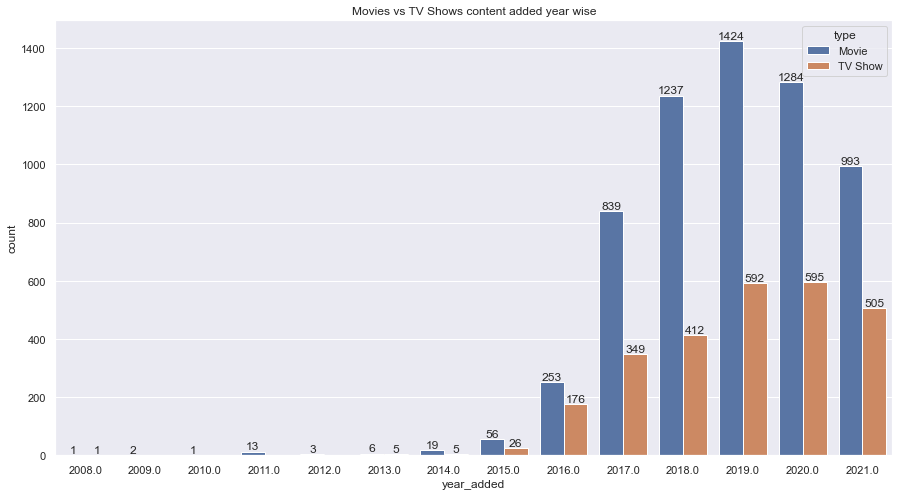

conclusion:Netflix produces more Movies than TV shows


In [273]:
plt.figure(figsize = (15,8))
ax = sns.countplot(data=df, x='year_added', hue='type')
plt.bar_label(ax.containers[0],size=12)
plt.bar_label(ax.containers[1],size=12)
plt.title('Movies vs TV Shows content added year wise')
plt.show()
print('conclusion:' 'Netflix produces more Movies than TV shows yearly')

# release_year.release_year.value_counts().sort_index(ascending=False).to_frame()

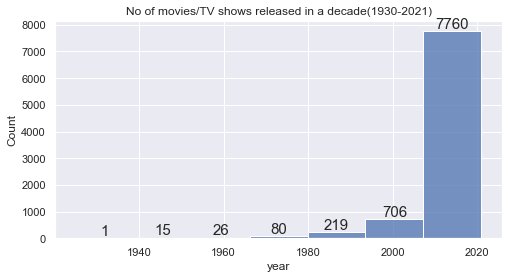

In [378]:
# No. of movies released in every decade
plt.figure(figsize = (8,4))
ax = sns.histplot(x = df['release_year'], data=df, bins=7)
plt.xlabel('year')
# plt.xlim([1950, 2021])
plt.bar_label(ax.containers[0],size=15)
plt.title('No of movies/TV shows released in a decade(1930-2021)')
plt.show()

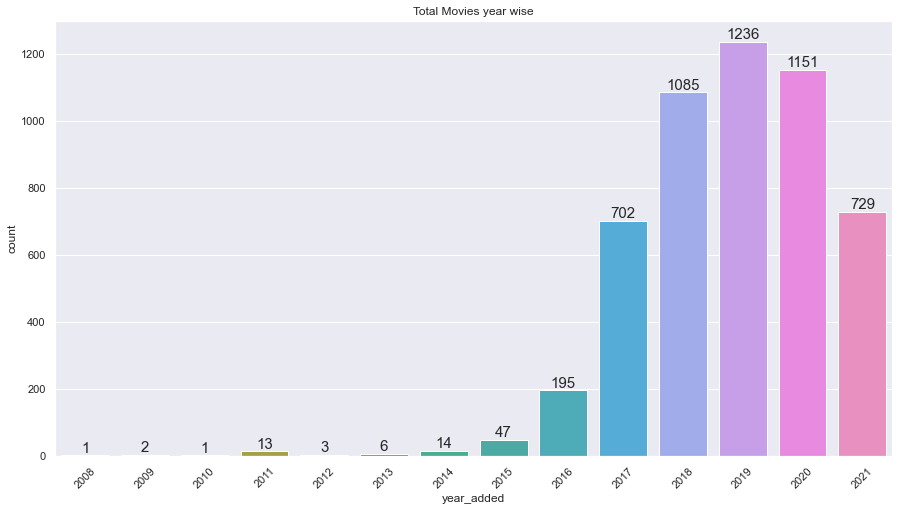

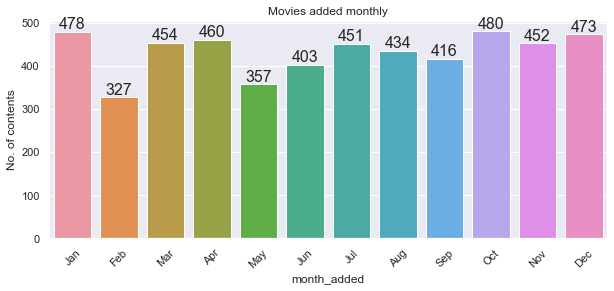

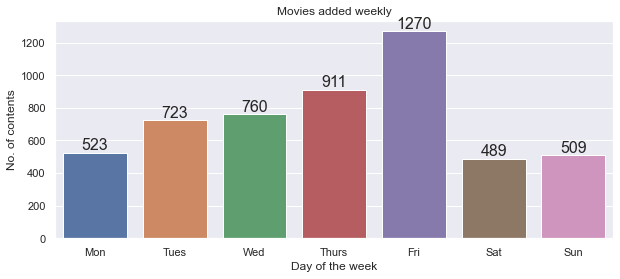

In [387]:
# Total movies year-wise
# movie['year_added'] = list(map(int, movie['converted_date_added'].dt.year))
movie = df[df['type']=='Movie']
movie.dropna(inplace=True)
# print(movie.head())
plt.figure(figsize = (15,8))
ax = sns.countplot(data=movie, x='year_added')
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0],size=15)
plt.title('Total Movies year wise')
plt.show()

movie['month_added'] = list(map(int, movie['converted_date_added'].dt.month))
movie['day_added'] = list(map(int, movie['converted_date_added'].dt.dayofweek))

# Total Movies monthly
plt.figure(figsize = (10,4))
ax=sns.countplot(x='month_added', data = movie)
plt.ylabel('No. of contents')
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.title('Movies added monthly')
plt.bar_label(ax.containers[0],size=16)
# plt.xlabel(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#Total movies weekly
plt.figure(figsize = (10,4))
ax=sns.countplot(x='day_added', data = movie)
plt.ylabel('No. of contents')
plt.xticks(range(0,7), ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.title('Movies added weekly')
plt.xlabel('Day of the week')
plt.bar_label(ax.containers[0],size=16)
# plt.xlabel(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

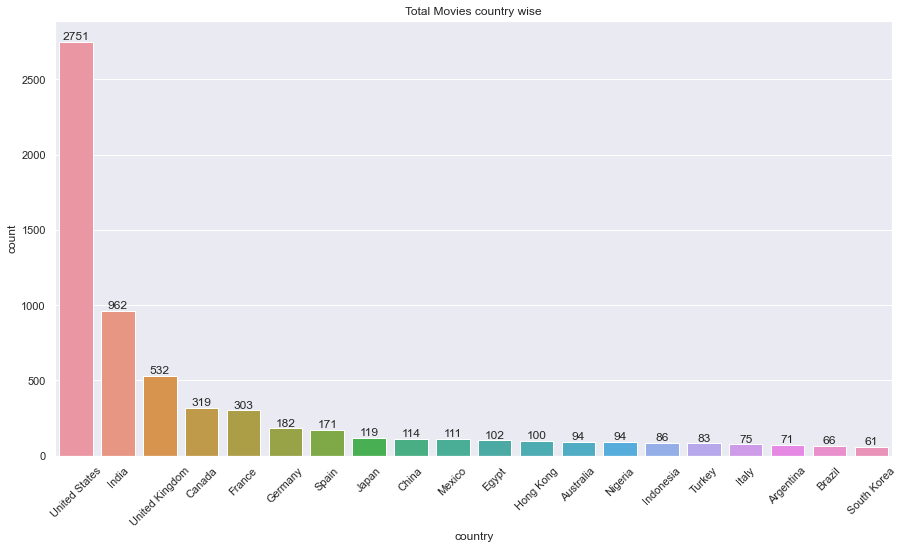

In [261]:
# Total no.of movies country wise
movie = country[country['type']=='Movie']
movie.dropna(inplace=True)

plt.figure(figsize = (15,8))
ax = sns.countplot(data=movie, x='country', order = movie['country'].value_counts().index[:20])
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0],size=12)
plt.title('Total Movies country wise')
plt.show()

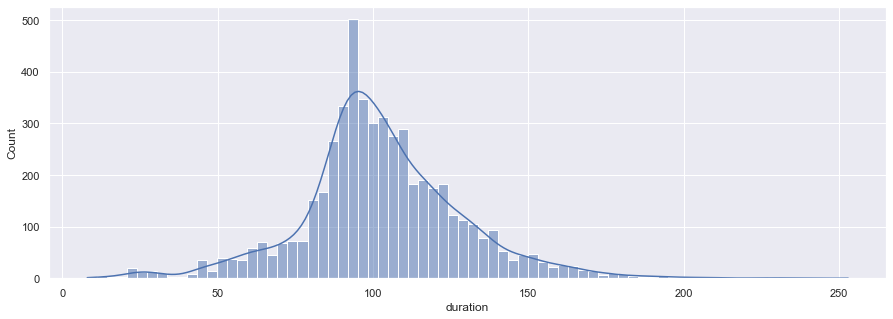

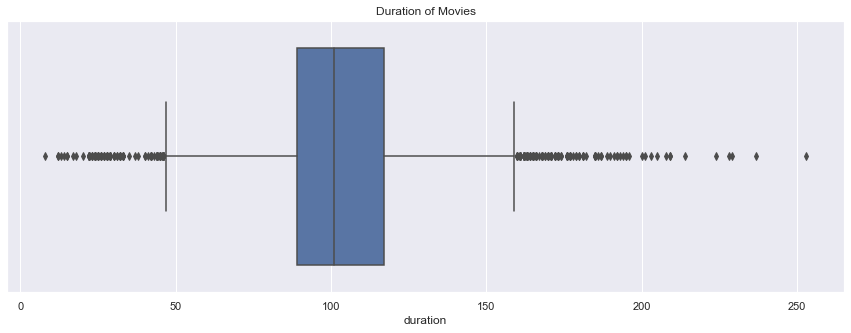

Average movie length 102.70144648023144


In [452]:
movie = df[df['type']=='Movie']
movie.dropna(inplace=True)
movie['duration'] = movie['duration'].apply(lambda x: int(str(x).split()[0]))
movie['duration'] = movie['duration'].apply(lambda x: int(x))

plt.figure(figsize = (15,5))
sns.histplot(data=movie, x='duration', kde=True)
plt.show()

plt.figure(figsize = (15,5))
sns.boxplot(data=movie, x='duration')
plt.title('Duration of Movies')
plt.show()

print('Average movie length', movie.duration.mean())

In [461]:
movie['duration'].describe()

count    6393.000000
mean      101.157047
std        26.694578
min         3.000000
25%        88.000000
50%        99.000000
75%       115.000000
max       312.000000
Name: duration, dtype: float64

Average Movie Duration Across Top 15 Countries: 101.15704676990458 minutes


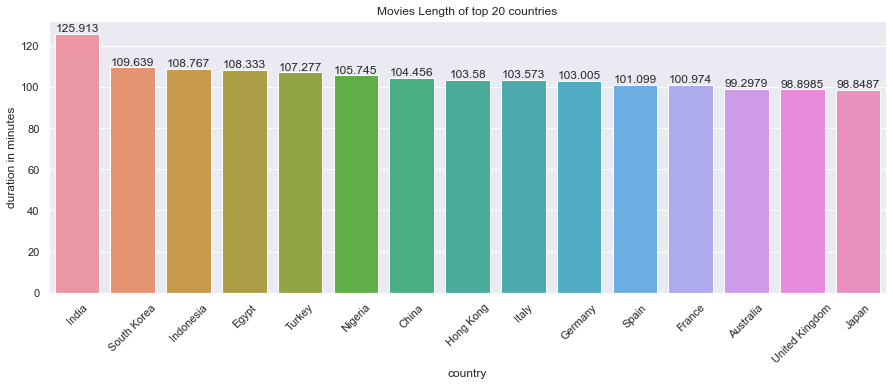

In [453]:
# Movie average duration country wise
movie = country_duration[country_duration['type']=='Movie']
movie.dropna(inplace=True)

movie['duration'] = movie['duration'].apply(lambda x: int(str(x).split()[0]))
movie['duration'] = movie['duration'].apply(lambda x: int(x))
movie1 = movie.groupby('country')['duration'].mean().reset_index().sort_values(by=['duration'], ascending=False).iloc[:15]

print('Average Movie Duration Across Top 15 Countries:', movie.duration.mean(), 'minutes')

plt.figure(figsize = (15,5))
ax = sns.barplot(x = 'country', y = 'duration', data = movie1)
plt.bar_label(ax.containers[0],size=12)
plt.xticks(rotation=45)
plt.ylabel('duration in minutes')
plt.title('Movies Length of top 20 countries')
plt.show()


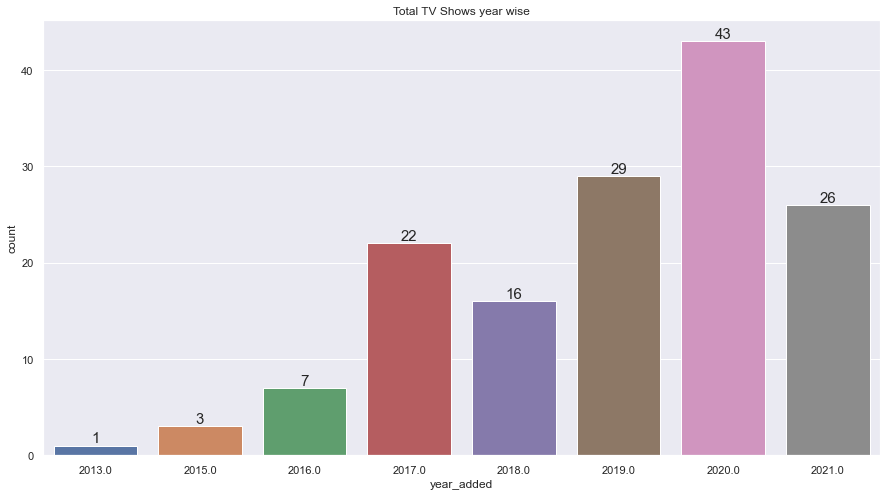

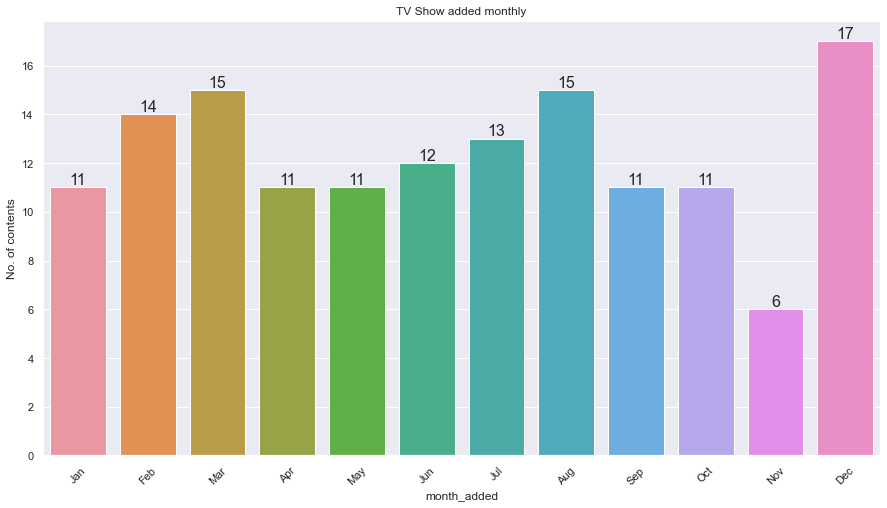

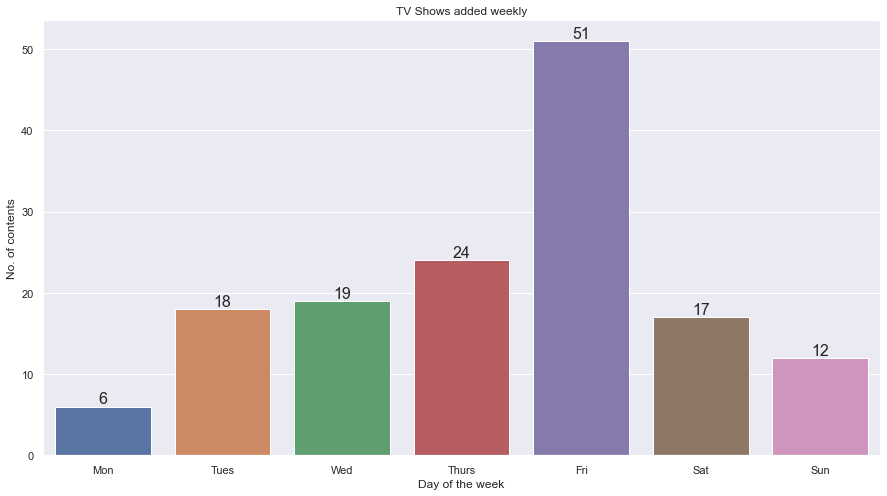

In [360]:
# Total TV Shows year-wise
tv_show = df[df['type']=='TV Show']
tv_show.dropna(inplace=True)

plt.figure(figsize = (15,8))
ax = sns.countplot(data=tv_show, x='year_added')
plt.xticks()
plt.bar_label(ax.containers[0],size=15)
plt.title('Total TV Shows year wise')
plt.show()


tv_show['month_added'] = list(map(int, tv_show['converted_date_added'].dt.month))
tv_show['day_added'] = list(map(int, tv_show['converted_date_added'].dt.dayofweek))
# print(tv_show.head())
plt.figure(figsize = (15,8))
ax=sns.countplot(x='month_added', data = tv_show)
plt.ylabel('No. of contents')
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.title('TV Show added monthly')
plt.bar_label(ax.containers[0],size=16)
# plt.xlabel(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

plt.figure(figsize = (15,8))
ax=sns.countplot(x='day_added', data = tv_show)
plt.ylabel('No. of contents')
plt.xticks(range(0,7), ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.title('TV Shows added weekly')
plt.xlabel('Day of the week')
plt.bar_label(ax.containers[0],size=16)
# plt.xlabel(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

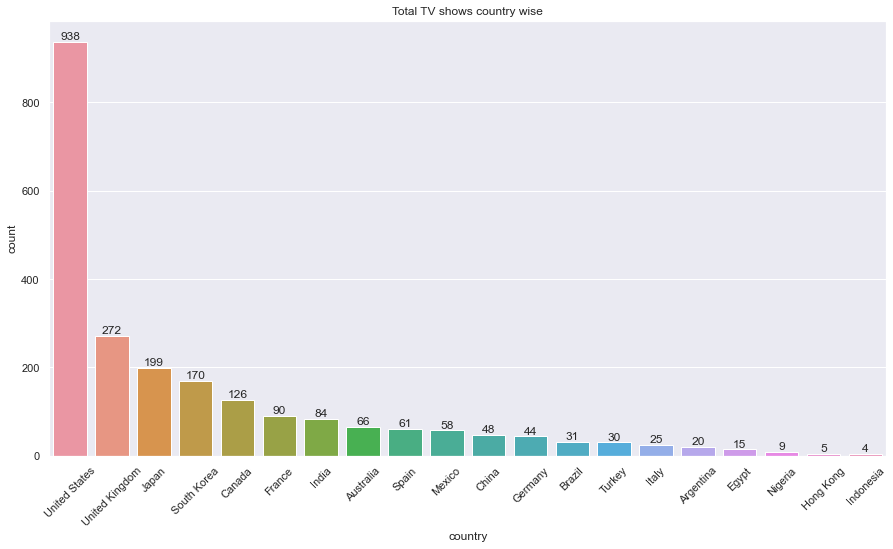

In [274]:
tv_show = country[country['type']=='TV Show']
tv_show.dropna(inplace=True)

plt.figure(figsize = (15,8))
ax = sns.countplot(data=tv_show, x='country', order = tv_show['country'].value_counts().index[:20])
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0],size=12)
plt.title('Total TV shows country wise')
plt.show()

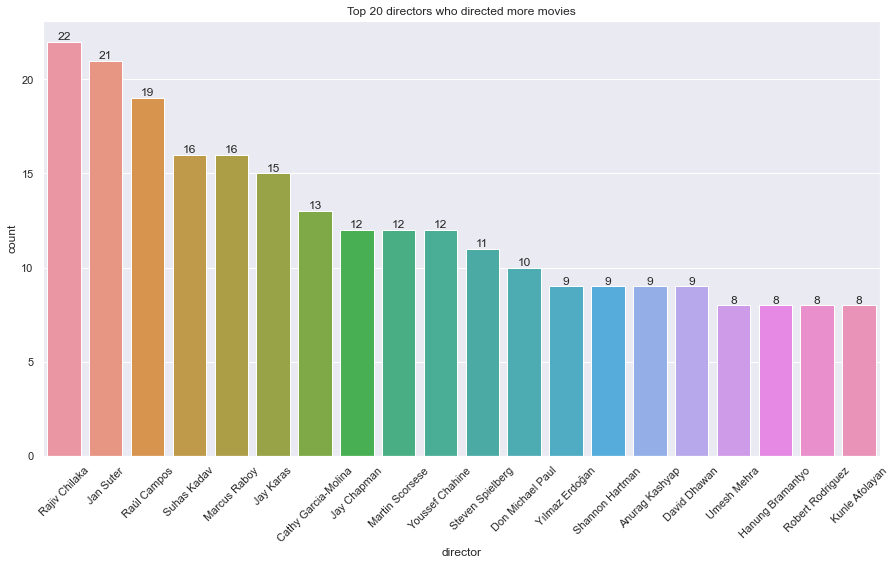

In [299]:
# Directors
constraint = df['director'].apply(lambda x: str(x).split(', ')).tolist()

director = pd.DataFrame(constraint, index=df['title'])

director = director.stack()
director = pd.DataFrame(director)
director.reset_index(inplace=True)
director.drop('level_1', axis=1, inplace=True)
director.columns=['tite', 'director']
director = director[director['director']!='nan']

plt.figure(figsize = (15,8))
ax = sns.countplot(data=director, x='director', order=director['director'].value_counts().index[:20])
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0],size=12)
plt.title('Top 20 directors who directed more movies')
plt.show()

In [399]:
direct = director['director'].value_counts().to_frame().reset_index()
direct.columns = ['Director_Name', 'Total_Movies']
direct

,Director_Name,Total_Movies
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
...,...,...
4988,Harald Zwart,1
4989,Michael Lockshin,1
4990,Michael Civille,1
4991,Melanie Mayron,1


In [464]:
list(direct['Director_Name'])

['Rajiv Chilaka',
 'Jan Suter',
 'Raúl Campos',
 'Suhas Kadav',
 'Marcus Raboy',
 'Jay Karas',
 'Cathy Garcia-Molina',
 'Jay Chapman',
 'Martin Scorsese',
 'Youssef Chahine',
 'Steven Spielberg',
 'Don Michael Paul',
 'Yılmaz Erdoğan',
 'Shannon Hartman',
 'Anurag Kashyap',
 'David Dhawan',
 'Umesh Mehra',
 'Hanung Bramantyo',
 'Robert Rodriguez',
 'Kunle Afolayan',
 'Lance Bangs',
 'Quentin Tarantino',
 'Fernando Ayllón',
 'Ryan Polito',
 'Justin G. Dyck',
 'Hakan Algül',
 'Troy Miller',
 'Johnnie To',
 'Priyadarshan',
 'Prakash Satam',
 'Ron Howard',
 'Dibakar Banerjee',
 'McG',
 'Omoni Oboli',
 'Ozan Açıktan',
 'Ram Gopal Varma',
 'Hidenori Inoue',
 'Clint Eastwood',
 'S.S. Rajamouli',
 'Leslie Small',
 'Mae Czarina Cruz',
 'Lasse Hallström',
 'Toshiya Shinohara',
 'Noah Baumbach',
 'Ashutosh Gowariker',
 'Rocky Soraya',
 'Sooraj R. Barjatya',
 'Michael Simon',
 'Steve Ball',
 'Riri Riza',
 'Milan Luthria',
 'Steven Soderbergh',
 'David Fincher',
 'Imtiaz Ali',
 'Wong Jing',
 'Sameh

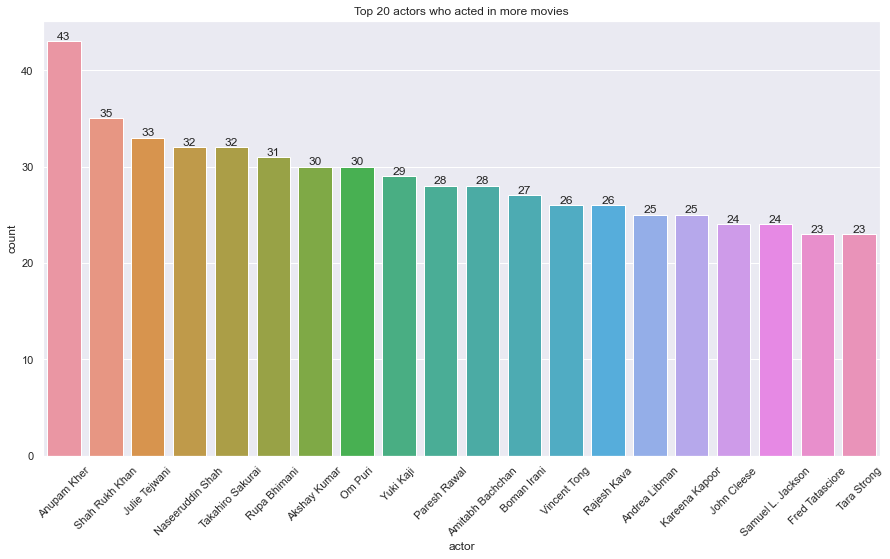

In [412]:
constraint = df['cast'].apply(lambda x: str(x).split(', ')).tolist()

actor = pd.DataFrame(constraint, index=df['title'])

actor = actor.stack()
actor = pd.DataFrame(actor)
actor.reset_index(inplace=True)
actor.drop('level_1', axis=1, inplace=True)
actor.columns=['tite', 'actor']
actor = actor[actor['actor']!='nan']

plt.figure(figsize = (15,8))
ax = sns.countplot(data=actor, x='actor', order=actor['actor'].value_counts().index[:20])
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0],size=12)
plt.title('Top 20 actors who acted in more movies')
plt.show()

In [414]:
# actor = actor.drop('index', axis=1)
actor = actor['actor'].value_counts().reset_index()
actor.columns=['actor_name', 'No. of movies']
actor

,actor_name,No. of movies
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
...,...,...
36398,Rodrigo Jerez,1
36399,Sarinrat Thomas,1
36400,Kichu Tellus,1
36401,Quentin Tarantino,1


In [463]:
list(actor.actor_name)

['Anupam Kher',
 'Shah Rukh Khan',
 'Julie Tejwani',
 'Naseeruddin Shah',
 'Takahiro Sakurai',
 'Rupa Bhimani',
 'Akshay Kumar',
 'Om Puri',
 'Yuki Kaji',
 'Paresh Rawal',
 'Amitabh Bachchan',
 'Boman Irani',
 'Vincent Tong',
 'Rajesh Kava',
 'Andrea Libman',
 'Kareena Kapoor',
 'John Cleese',
 'Samuel L. Jackson',
 'Fred Tatasciore',
 'Tara Strong',
 'Jigna Bhardwaj',
 'Daisuke Ono',
 'Junichi Suwabe',
 'Ashleigh Ball',
 'Ajay Devgn',
 'Nicolas Cage',
 'Nawazuddin Siddiqui',
 'Kay Kay Menon',
 'David Attenborough',
 'Adam Sandler',
 'Salman Khan',
 'Morgan Freeman',
 'Yuichi Nakamura',
 'Mamoru Miyano',
 'Gulshan Grover',
 'James Franco',
 'Fred Armisen',
 'Ai Kayano',
 'Erin Fitzgerald',
 'David Spade',
 'Seth Rogen',
 'Anil Kapoor',
 'Diana Kaarina',
 'Yashpal Sharma',
 'Vatsal Dubey',
 'Rajesh Sharma',
 'Debi Derryberry',
 'Kana Hanazawa',
 'Fortune Feimster',
 'Jackie Shroff',
 'Kate Higgins',
 'Danny Trejo',
 'Bruce Willis',
 'Brian Drummond',
 'Michela Luci',
 'Laura Bailey',
 '

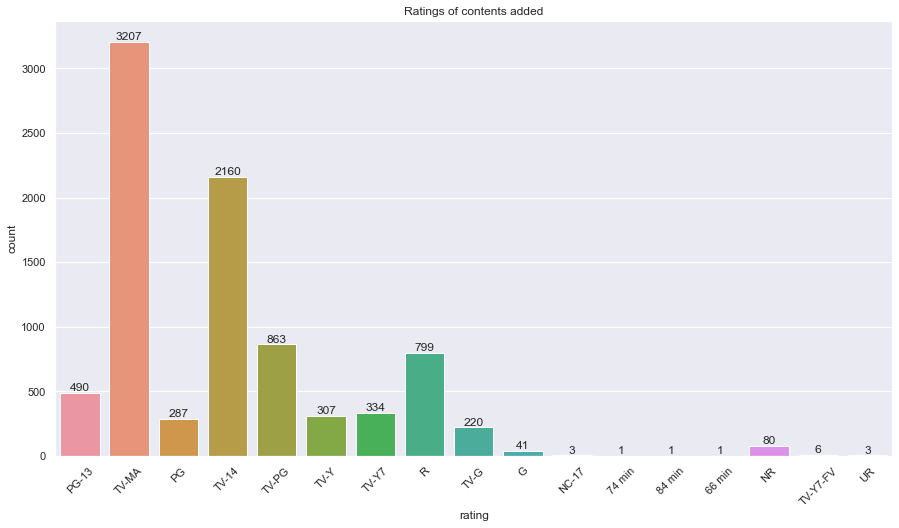

Conclusion: Netflix produces larger no. of TV-MA content


In [307]:
plt.figure(figsize = (15,8))
ax = sns.countplot(data=df, x='rating')
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0],size=12)
plt.title('Ratings of contents added')
plt.show()
print('Conclusion:', 'Netflix produces larger no. of TV-MA content')

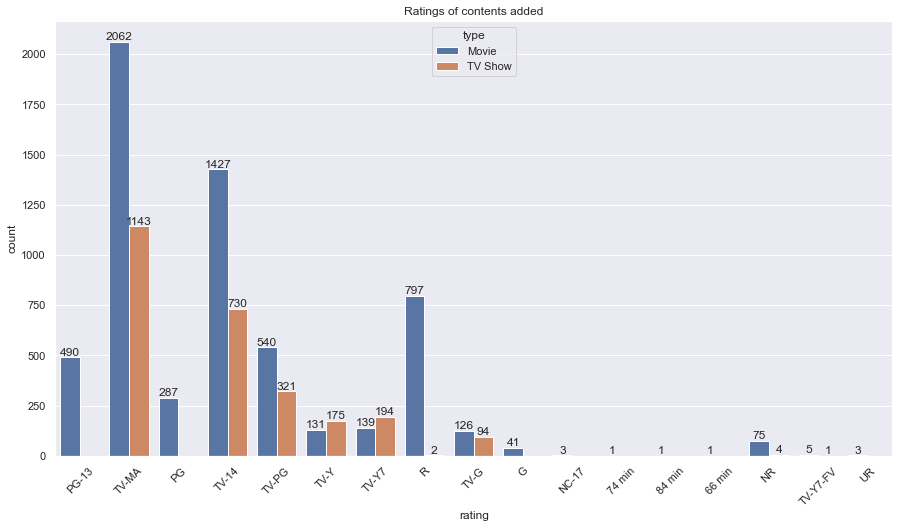

In [442]:
plt.figure(figsize = (15,8))
ax = sns.countplot(data=df, x='rating', hue='type')
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0],size=12)
plt.bar_label(ax.containers[1],size=12)
plt.title('Ratings of contents added')
plt.show()

In [440]:
rating = df['rating'].value_counts().reset_index()
rating.columns = ['rating', 'count']
rating.head()

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490


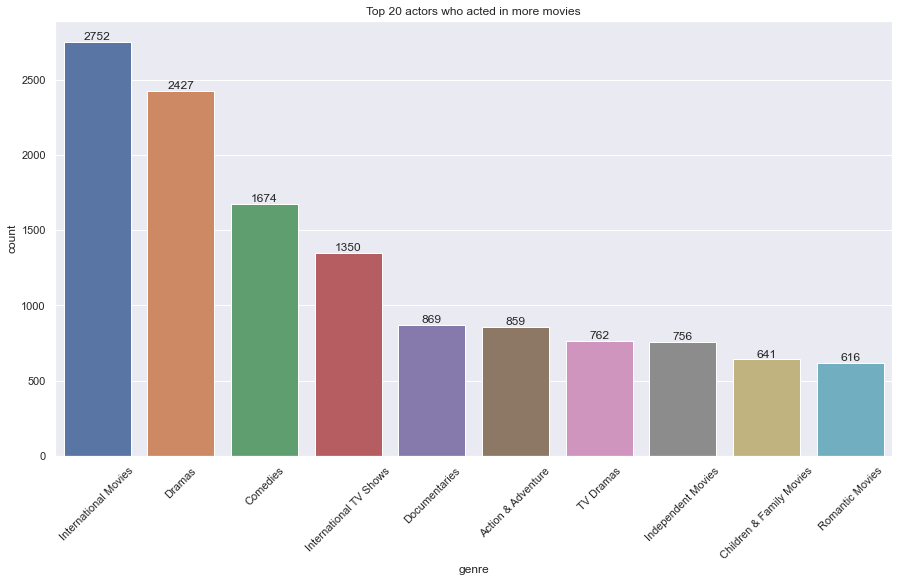

In [432]:
constraint = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()

genre = pd.DataFrame(constraint, index=df['title'])

genre = genre.stack()
genre = pd.DataFrame(genre)
genre.reset_index(inplace=True)
genre.drop('level_1', axis=1, inplace=True)
# print(genre.head())
genre.columns=['title', 'genre']
genre = genre[genre['genre']!='nan']

plt.figure(figsize = (15,8))
ax = sns.countplot(data=genre, x='genre', order=genre['genre'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0],size=12)
plt.title('Top 20 actors who acted in more movies')
plt.show()

In [438]:
gen = genre['genre'].value_counts().reset_index()
gen.columns = ['Genre Name', 'count']
gen.head(10)

,Genre Name,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1350
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,762
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616
